# NBA Players EDA


### Data: Basketball Reference (1982 - 2022)
<!-- <span style="background-color:yellow">MVP features</span> -->
<span style="background-color:lightblue">MVP</span>
<span style="background-color:red">Defensive POTY</span>
<span style="background-color:lightgreen"></span>
- **season**        (Year)
- **player**        (Player Name)
- **pos**           (Position)
- **age**           (Age)
- **team_id**       (Team Abbreviation) _"TOT" means total teams for players who played for multiple teams in one year_
- **g**             (Games Played)
- **gs**            (Games Started)
- **mp_per_g**      (Minutes per Game)
- <span style="background-color:lightblue">**fg_per_g**</span>     (Field Goals per Game)
- **fga_per_g**     (Field Goals Attempted per Game)
- <span style="background-color:lightblue">**fg_pct**</span>        (Field Goal Percentage per Game)
- <span style="background-color:lightblue">**fg3_per_g**</span>     (3pt Shots per Game)
- **fg3a_per_g**    (3pt Shot Attempts per Game)
- <span style="background-color:lightblue">**fg3_pct**</span>       (3pt Percentage per Game)
- <span style="background-color:lightblue">**fg2_per_g**</span>     (2pt Shots per Game)
- **fg2a_per_g**    (2pt Shot Attempts per Game)
- <span style="background-color:lightblue">**fg2_pct**</span>       (2pt Percentage per Game)
- <span style="background-color:lightblue">**efg_pct**</span> (Effective Shooting Percentage per Game) _High Level Stat taking into account num of points scored on each possession_

$$eFG\%=\frac{\text{2pt FG} + (1.5 \times \text{3pt FG})}{FGA}$$

- <span style="background-color:lightblue">**ft_per_g**</span> (Free Throws per Game)
- **fta_per_g** (Free Throw Attempts per Game)
- <span style="background-color:lightblue">**ft_pct**</span> (Free Throw percentage per Game)
- <span style="background-color:red">**orb_per_g**</span> (Offensive Rebounds per Game)
- <span style="background-color:red">**drb_per_g**</span> (Defensive Rebounds per Game)
- <span style="background-color:red">**trb_per_g**</span> (Total Rebounds per Game)
- <span style="background-color:lightblue">**ast_per_g**</span> (Assists per Game)
- <span style="background-color:red">**stl_per_g**</span> (Steals per Game)
- <span style="background-color:red">**blk_per_g**</span> (Blocks per Game)
- <span style="background-color:lightblue">**tov_per_g**</span> (Turnovers per Game)
- **pf_per_g** (Personal Fouls per Game)
- <span style="background-color:lightblue">**pts_per_g**</span> (Points per Game)
- <span style="background-color:red">**mp**</span> (Minutes Played)
- <span style="background-color:lightblue">**per**</span> (Player Efficiency Rating)
- <span style="background-color:lightblue">**ts_pct**</span> (True Shooting Percentage)
$$TS\% = \frac{PTS}{2*(FGA + 0.44*FTA)}$$
- <span style="background-color:lightblue">**fg3a_per_fga_pct**</span> (3pt Shots Attempted per Field Goal Shot Attempted Percentage)
- <span style="background-color:lightblue">**fta_per_fga_pct**</span> (Free Throw Shot Attempted per Field Goal Shot Percentage)
- <span style="background-color:red">**orb_pct**</span> (Offensive Rebound Percentage)
- <span style="background-color:red">**drb_pct**</span> (Defensive Rebound Percentage)
- <span style="background-color:red">**trb_pct**</span> (Total Rebound Percentage)
- <span style="background-color:lightblue">**ast_pct**</span> (Assist Percentage)
- <span style="background-color:red">**stl_pct**</span> (Steal Percentage)
- <span style="background-color:red">**blk_pct**</span> (Block Percentage)
- **tov_pct** (Turnover Percentage)
- <span style="background-color:lightblue">**usg_pct**</span> (Usage Percentage)
- <span style="background-color:lightblue">**ows**</span> (Offensive Win Shares)
- <span style="background-color:red">**dws**</span> (Defensive Win Shares)
- <span style="background-color:lightblue">**ws**</span> (Win Shares) _Estimated Num of Wins contributed by Player_
- **ws_per_48** (Win Shares per 48 Minutes played)
- <span style="background-color:lightblue">**obpm**</span> (Offensive Box +/-)
- <span style="background-color:red">**dbpm**</span> (Defensive Box +/-)
- **bpm** (Box +/-)
- <span style="background-color:lightblue">**vorp**</span> (Value over Replacement Player)
- **award_share** (MVP Voting Win Share Percentage)
- **mov** (Average Margin of Victory during Season)
- **adj_mov** (Average Margin of Victory Adjusted for Opponent Difficulty during Season)
- **win_loss_pct** (Team Win Loss Percentage)

### Current Season Data as of: 1/27/2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# UMAP
import umap
import dcor

In [5]:
player_data = pd.read_csv('data/NBA_dataset.csv')
curr_season_pcts = pd.read_csv('data/2023-2024_NBA.csv')
curr_season_pcts = curr_season_pcts.drop(columns=[curr_season_pcts.columns[19], curr_season_pcts.columns[24]])
curr_season_pg = pd.read_csv('data/2023-2024_NBA_per_game.csv')

In [6]:
print(curr_season_pcts.columns)
print(curr_season_pg.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Player-additional'],
      dtype='object')
Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')


In [7]:
mappings = {"Player":"player", "Pos":"pos", "Age":"age", "Tm":"team_id",
            "G":"g", "GS":"gs" ,"MP":"mp", "PER":"per", "TS%":"ts_pct", "3PAr":"fg3a_per_fga_pct", "FTr":"fta_per_fga_pct",
            "ORB%":"orb_pct", "DRB%":"drb_pct", "TRB%":"trb_pct", "AST%":"ast_pct", "STL%":"stl_pct", "BLK%":"blk_pct",
            "TOV%":"tov_pct", "USG%":"usg_pct", "OWS":"ows", "DWS":"dws", "WS":"ws", "WS/48":"ws_per_48", "OBPM":"obpm",
            "DBPM":"dbpm", "BPM":"bpm", "VORP":"vorp"}
per_game_mappings = {"MP":"mp_per_g", "FG":"fg_per_g", "FGA":"fga_per_g", "FG%":"fg_pct", "3P":"fg3_per_g",
                     "3PA":"fg3a_per_g", "3P%":"fg3_pct", "2P":"fg2_per_g", "2PA":"fg2a_per_g", "2P%":"fg2_pct",
                     "eFG%":"efg_pct", "FT":"ft_per_g", "FTA":"fta_per_g", "FT%":"ft_pct", "ORB":"orb_per_g",
                     "DRB":"drb_per_g", "TRB":"trb_per_g", "AST":"ast_per_g", "STL":"stl_per_g", "BLK":"blk_per_g",
                     "TOV":"tov_per_g", "PF":"pf_per_g", "PTS":"pts_per_g", "Player":"player", "Pos":"pos",
                     "Age":"age", "Tm":"team_id", "G":"g", "GS":"gs" }

In [8]:
#Preprocess curr_season
curr_season_pcts = curr_season_pcts.fillna(0.0)
curr_season_pg = curr_season_pg.fillna(0.0)


curr_season_pcts = curr_season_pcts.rename(columns=mappings)
curr_season_pg = curr_season_pg.rename(columns=per_game_mappings)

curr_season_pcts['season'] = 2024
curr_season_pg['season'] = 2024
curr_season_pcts_final = curr_season_pcts.drop(columns=["Player-additional"])
curr_season_pg_final = curr_season_pg.drop(columns=["Player-additional"])
curr_season_pg_final.isna().sum()
len(player_data)

17697

In [9]:
print(curr_season_pg_final.columns)
print(curr_season_pcts_final.columns)
print(player_data.columns)

Index(['Rk', 'player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'season'],
      dtype='object')
Index(['Rk', 'player', 'pos', 'age', 'team_id', 'g', 'mp', 'per', 'ts_pct',
       'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct',
       'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws',
       'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'season'],
      dtype='object')
Index(['season', 'player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', '

In [10]:
len(curr_season_pcts_final)

577

In [11]:
data = pd.merge(curr_season_pg_final, curr_season_pcts_final, how='left')
data.sort_values('per', ascending=False).iloc[:,30:]
color_list = ["beige" for i in range(len(data))]
name_list = ["" for i in range(len(data))]

color_list[174] = 'red' #Shai Gilgeous-Alexander
name_list[174] = 'Shai Gilgeous-Alexander'
color_list[11] = 'red' #Giannis Antetokounmpo
name_list[11] = "Giannis Antetokounmpo"
color_list[133] = 'red' #Luka Doncic
name_list[133] = "Luka Dončić"

color_list[145] = 'red' #Joel Embiid
name_list[145] = "Joel Embiid"
color_list[139] = 'pink' #Kevin Durant
# name_list[139] = "Kevin Durant"
color_list[60] = 'green' #Devin Booker
# name_list[60] = "Devin Booker"
color_list[350] = 'pink' #Donovan Mitchell
# name_list[350] = "Donovan Mitchell"
color_list[157] = 'pink' #De'Aaron Fox
# name_list[157] = "De'Aaron Fox"
color_list[573] = 'pink' #Trae Young
# name_list[573] = "Trae Young"
color_list[495] = 'green' #Jayson Tatum
# name_list[495] = "Jayson Tatum"
color_list[257] = 'red' #Nikola Jokić
name_list[257] = "Nikola Jokić"
color_list[186] = 'black'
name_list[186] = "Draymond Green"
color_list[119] = 'pink'
name_list[119] = "Stephen Curry"
color_list[72] = 'black'
name_list[72] = 'Dillon Brooks'
color_list[548] = 'green'
name_list[548] = 'Derrick White'
data.isna().sum()

Rk                  0
player              0
pos                 0
age                 0
team_id             0
g                   0
gs                  0
mp_per_g            0
fg_per_g            0
fga_per_g           0
fg_pct              0
fg3_per_g           0
fg3a_per_g          0
fg3_pct             0
fg2_per_g           0
fg2a_per_g          0
fg2_pct             0
efg_pct             0
ft_per_g            0
fta_per_g           0
ft_pct              0
orb_per_g           0
drb_per_g           0
trb_per_g           0
ast_per_g           0
stl_per_g           0
blk_per_g           0
tov_per_g           0
pf_per_g            0
pts_per_g           0
season              0
mp                  0
per                 0
ts_pct              0
fg3a_per_fga_pct    0
fta_per_fga_pct     0
orb_pct             0
drb_pct             0
trb_pct             0
ast_pct             0
stl_pct             0
blk_pct             0
tov_pct             0
usg_pct             0
ows                 0
dws       

In [12]:
data.sort_values('ast_per_g', ascending=False).iloc[:20,:]

,Rk,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
194,177,Tyrese Haliburton,PG,23,IND,34,34,33.4,8.4,16.9,...,11.7,26.2,5.1,0.5,5.6,0.238,9.5,-0.6,8.9,3.1
573,530,Trae Young,PG,25,ATL,40,40,36.3,8.3,19.6,...,15.5,31.1,3.2,0.4,3.6,0.119,5.2,-2.2,3.0,1.8
133,120,Luka Dončić,PG,24,DAL,38,38,37.1,11.8,24.0,...,12.4,36.5,4.5,1.6,6.1,0.208,8.7,1.2,9.9,4.3
257,240,Nikola Jokić,C,28,DEN,45,45,33.5,10.3,17.4,...,12.9,29.5,7.2,2.5,9.8,0.310,10.0,4.4,14.4,6.3
197,180,James Harden,PG,34,LAC,38,38,34.3,5.2,11.3,...,16.2,20.4,3.7,1.6,5.3,0.195,4.3,0.8,5.1,2.4
524,483,Fred VanVleet,PG,29,HOU,42,42,37.1,5.7,14.0,...,9.3,19.7,2.9,1.9,4.8,0.148,2.9,0.8,3.6,2.2
358,333,Ja Morant,PG,24,MEM,9,9,35.3,8.9,18.9,...,12.0,30.3,0.5,0.4,0.8,0.126,2.7,0.5,3.1,0.4
27,22,LaMelo Ball,PG,22,CHO,22,22,32.3,8.3,19.2,...,15.0,33.6,0.6,0.4,1.0,0.068,3.5,-0.7,2.8,0.9
451,416,Domantas Sabonis,C,27,SAC,43,43,35.3,8.0,13.1,...,17.6,22.4,4.5,1.8,6.3,0.200,3.7,2.2,5.9,3.0
245,228,LeBron James,PF,39,LAL,41,41,34.3,9.3,17.8,...,14.3,29.7,2.3,1.8,4.1,0.138,5.2,1.0,6.1,2.9


In [13]:
data['per'].mean()

12.43084922010398

NameError: name 'correlate' is not defined

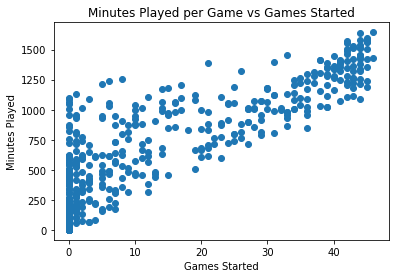

In [14]:
# plt.boxplot(data['mp_per_g'])
plt.scatter(data['gs'], data['mp'])
plt.xlabel("Games Started")
plt.ylabel("Minutes Played")
plt.title("Minutes Played per Game vs Games Started")
correlate(data, "gs", "mp")

In [ ]:
print(dcor.distance_correlation(data['per'],data['vorp']))
plt.scatter(data['per'], data['vorp'])
plt.xlabel("PER")
plt.ylabel("VORP")
plt.title("Player Efficiency Rating vs Value over Replacement Player")

0.906599507503588


NameError: name 'correlate' is not defined

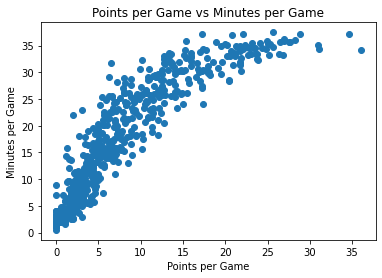

In [15]:
import dcor
print(dcor.distance_correlation(data['pts_per_g'],data['mp_per_g']))
plt.scatter(data['pts_per_g'], data['mp_per_g'])
plt.xlabel("Points per Game")
plt.ylabel("Minutes per Game")
plt.title("Points per Game vs Minutes per Game")
correlate(data, 'pts_per_g', 'mp_per_g')

In [16]:

def correlate(df,x,y):
    cov1 = np.cov(df[x],df[y])[0][1]
    denom = np.sqrt(np.cov(df[x],df[y])[0][0]) * np.sqrt(np.cov(df[x],df[y])[1][1])
    print(cov1)
    print(denom)
    return print(f"The correlation between {x} and {y} is {cov1 / denom}")


# correlate(data, 'fg_per_g', 'fga_per_g')
# correlate(data, 'fga_per_g', 'mp')
# correlate(data, 'stl_pct', 'blk_pct')
# correlate(data, 'efg_pct', 'usg_pct')
# correlate(data, 'per', 'vorp')
correlate(data, 'fg3_pct', 'fg2_pct')
# fig, ax = plt.subplots(figsize=(8,8))
# im = ax.imshow(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']).corr(), interpolation='nearest')
# fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Show all ticks and label them with the dataframe column name
# ax.set_xticklabels(data.columns, rotation=65, fontsize=15)
# ax.set_yticklabels(data.columns, rotation=0, fontsize=15)


# plt.show()
data['fg2_pct'].isna().sum()

0.0004126094171240124
0.03142976119205604
The correlation between fg3_pct and fg2_pct is 0.01312798447950984


0

In [11]:
df1 = data.drop(columns=['Rk','player', 'pos', 'team_id', 'season'])
df1['age'] = np.asarray(df1['age'], dtype='float64')
df1['g'] = np.asarray(df1['g'], dtype='float64')
df1['gs'] = np.asarray(df1['gs'], dtype='float64')
df1['mp'] = np.asarray(df1['mp'], dtype='float64')
df1.dtypes

age                 float64
g                   float64
gs                  float64
mp_per_g            float64
fg_per_g            float64
fga_per_g           float64
fg_pct              float64
fg3_per_g           float64
fg3a_per_g          float64
fg3_pct             float64
fg2_per_g           float64
fg2a_per_g          float64
fg2_pct             float64
efg_pct             float64
ft_per_g            float64
fta_per_g           float64
ft_pct              float64
orb_per_g           float64
drb_per_g           float64
trb_per_g           float64
ast_per_g           float64
stl_per_g           float64
blk_per_g           float64
tov_per_g           float64
pf_per_g            float64
pts_per_g           float64
mp                  float64
per                 float64
ts_pct              float64
fg3a_per_fga_pct    float64
fta_per_fga_pct     float64
orb_pct             float64
drb_pct             float64
trb_pct             float64
ast_pct             float64
stl_pct             

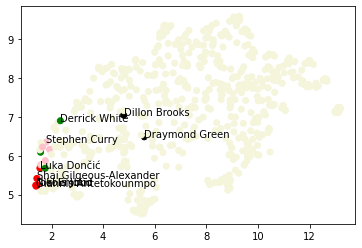

In [171]:
#UMAP
reducer = umap.UMAP(n_components = 2, n_neighbors = 10)
scaled_player_data = StandardScaler().fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))
umap_data = reducer.fit_transform(scaled_player_data)
# umap_data = reducer.fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))

plt.scatter(umap_data[:, 0], umap_data[:, 1], c=color_list)

for i, txt in enumerate(name_list):
    plt.annotate(txt, (umap_data[:, 0][i], umap_data[:, 1][i]))
# plt.xlim(min(umap_data[:, 0]), min(umap_data[:, 0]))
# plt.ylim(min(umap_data[:, 1]), min(umap_data[:, 1]))
plt.show()

In [48]:
len(data)

577

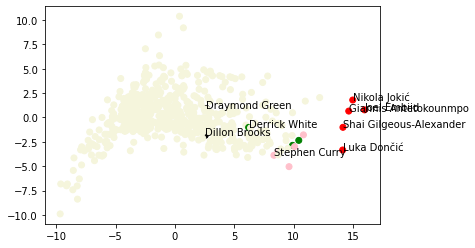

In [172]:
#PCA
pca = PCA(n_components=4)
scaled_player_data = StandardScaler().fit_transform(data.drop(columns=['Rk','player','pos', 'team_id', 'season']))
pca_data = pca.fit_transform(scaled_player_data)
# pca_data = pca.fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color_list)
for i, txt in enumerate(name_list):
    plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]))
# plt.xlim(14,max(pca_data[:, 0]))

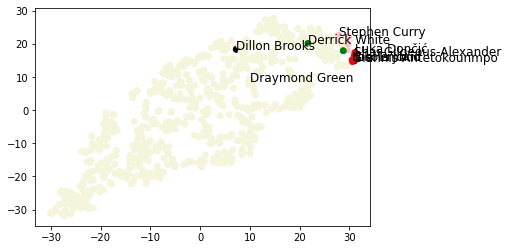

In [175]:
#TSNE
scaled_player_data = StandardScaler().fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(pca_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=color_list)
for i, txt in enumerate(name_list):
    plt.annotate(txt, (tsne_data[:, 0][i], tsne_data[:, 1][i]), fontsize=12)

### Offensive POTY Data
Features:
- <span style="background-color:lightblue">**fg_per_g**</span>      (Field Goals per Game)
- <span style="background-color:lightblue">**fg_pct**</span>        (Field Goal Percentage per Game)
- <span style="background-color:lightblue">**fg3_per_g**</span>     (3pt Shots per Game)
- <span style="background-color:lightblue">**fg3_pct**</span>       (3pt Percentage per Game)
- <span style="background-color:lightblue">**fg2_per_g**</span>     (2pt Shots per Game)
- <span style="background-color:lightblue">**fg2_pct**</span>       (2pt Percentage per Game)
- <span style="background-color:lightblue">**efg_pct**</span> (Effective Shooting Percentage per Game) _High Level Stat taking into account num of points scored on each possession_
$$eFG\%=\frac{2ptFG + (1.5 * 3ptFG)}{FGA}$$
- <span style="background-color:lightblue">**ft_per_g**</span> (Free Throws per Game)
- <span style="background-color:lightblue">**ft_pct**</span> (Free Throw percentage)
- <span style="background-color:lightblue">**ast_per_g**</span> (Assists per Game)
- <span style="background-color:lightblue">**tov_per_g**</span> (Turnovers per Game)
- <span style="background-color:lightblue">**pts_per_g**</span> (Points per Game)
- <span style="background-color:lightblue">**per**</span> (Player Efficiency Rating)
- <span style="background-color:lightblue">**ts_pct**</span> (True Shooting Percentage)
$$TS\% = \frac{PTS}{2*(FGA + 0.44*FTA)}$$
- <span style="background-color:lightblue">**fg3a_per_fga_pct**</span> (3pt Shots Attempted per Field Goal Shot Attempted Percentage)
- <span style="background-color:lightblue">**fta_per_fga_pct**</span> (Free Throw Shot Attempted per Field Goal Shot Percentage)
- <span style="background-color:lightblue">**ast_pct**</span> (Assist Percentage)
- <span style="background-color:lightblue">**usg_pct**</span> (Usage Percentage)
- <span style="background-color:lightblue">**ows**</span> (Offensive Win Shares)
- <span style="background-color:lightblue">**ws**</span> (Win Shares) _Estimated Num of Wins contributed by Player_
- <span style="background-color:lightblue">**obpm**</span> (Offensive Box +/-)
- <span style="background-color:lightblue">**vorp**</span> (Value over Replacement Percentage)

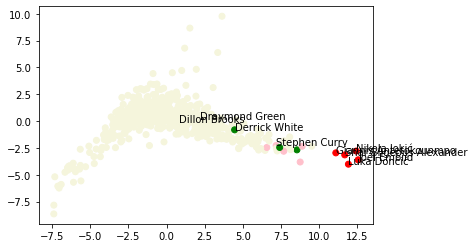

In [209]:
off_data = data.loc[:, ['fg_per_g', 'fg_pct', 'fg3_per_g', 'fg3_pct', 'fg2_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g', 'ft_pct', 'ast_per_g', 'ast_pct', 'tov_per_g', 'pts_per_g', 'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'usg_pct', 'ows', 'ws', 'obpm', 'vorp']]
off_data['tov_per_g'] = -1 * off_data['tov_per_g']
pca = PCA(n_components=2)
scaled_player_data = StandardScaler().fit_transform(off_data)
off_pca_data = pca.fit_transform(scaled_player_data)
# pca_data = pca.fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))

plt.scatter(off_pca_data[:, 0], off_pca_data[:, 1], c=color_list)
for i, txt in enumerate(name_list):
    plt.annotate(txt, (off_pca_data[:, 0][i], off_pca_data[:, 1][i]))

In [231]:
off_df = pd.DataFrame(off_pca_data)
print(off_df[off_df.iloc[:, 0] > 5].index)

Int64Index([ 11,  27,  30,  34,  60,  83,  89, 119, 121, 125, 133, 139, 142,
            145, 157, 170, 174, 194, 197, 235, 236, 245, 257, 285, 292, 312,
            322, 350, 358, 364, 414, 428, 446, 451, 462, 469, 470, 495, 513,
            524, 564, 573],
           dtype='int64')


In [235]:
data.loc[off_df[off_df.iloc[:, 0] > 5].index].sort_values('vorp', ascending=False)

,Rk,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
257,240,Nikola Jokić,C,28,DEN,45,45,33.5,10.3,17.4,...,12.9,29.5,7.2,2.5,9.8,0.310,10.0,4.4,14.4,6.3
174,157,Shai Gilgeous-Alexander,PG,25,OKC,44,44,34.3,10.9,20.1,...,8.1,33.0,6.8,2.7,9.5,0.300,7.3,2.8,10.1,4.6
133,120,Luka Dončić,PG,24,DAL,38,38,37.1,11.8,24.0,...,12.4,36.5,4.5,1.6,6.1,0.208,8.7,1.2,9.9,4.3
145,132,Joel Embiid,C,29,PHI,33,33,34.2,12.0,22.3,...,11.5,38.8,5.2,2.2,7.3,0.312,9.5,3.3,12.8,4.2
11,10,Giannis Antetokounmpo,PF,29,MIL,43,43,35.2,11.6,19.1,...,13.2,33.2,5.2,2.1,7.3,0.233,6.2,1.9,8.1,3.9
194,177,Tyrese Haliburton,PG,23,IND,34,34,33.4,8.4,16.9,...,11.7,26.2,5.1,0.5,5.6,0.238,9.5,-0.6,8.9,3.1
451,416,Domantas Sabonis,C,27,SAC,43,43,35.3,8.0,13.1,...,17.6,22.4,4.5,1.8,6.3,0.200,3.7,2.2,5.9,3.0
121,108,Anthony Davis,C,30,LAL,44,44,35.9,9.5,16.9,...,9.6,26.6,4.1,2.8,6.9,0.209,3.6,1.7,5.3,2.9
245,228,LeBron James,PF,39,LAL,41,41,34.3,9.3,17.8,...,14.3,29.7,2.3,1.8,4.1,0.138,5.2,1.0,6.1,2.9
139,126,Kevin Durant,PF,35,PHO,38,38,37.2,10.3,19.4,...,12.1,29.8,3.8,1.5,5.3,0.179,5.9,0.1,6.0,2.8


## 2021-2022 Season
MVP: Nikola Jokić

In [123]:
season22 = player_data[player_data['season'] == 2022]
season22 = season22.dropna().reset_index()
color_list = ['beige' for i in range(len(season22))]
name_list = ["" for i in range(len(season22))]

color_list[242] = 'gold'
name_list[242] = "Nikola Jokić"
color_list[135] = 'red'
name_list[135] = "Joel Embiid"
color_list[11] = 'red'
name_list[11] = 'Giannis Antetokounmpo'

In [124]:
season22[season22['player'] == 'Giannis Antetokounmpo']

,index,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
11,17103,2022,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,...,12.9,0.281,7.6,3.5,11.2,7.4,0.595,3.35,3.22,0.622


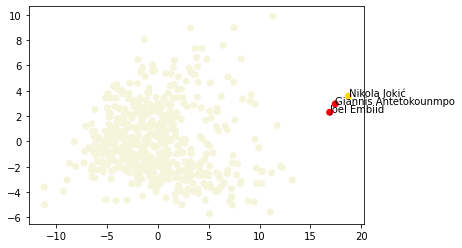

In [128]:
pca = PCA(n_components=2)
scaled_player_data = StandardScaler().fit_transform(season22.drop(columns=['player','pos', 'team_id', 'season']))
pca_data = pca.fit_transform(scaled_player_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color_list)
for i, txt in enumerate(name_list):
    plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]))

## ROTY EDA

In [23]:
def correlate(df,x,y):
    cov1 = np.cov(df[x],df[y])[0][1]
    denom = np.sqrt(np.cov(df[x],df[y])[0][0]) * np.sqrt(np.cov(df[x],df[y])[1][1])
    print(cov1)
    print(denom)
    return print(f"The correlation between {x} and {y} is {cov1 / denom}")

In [28]:
roty = pd.read_csv('data/rookie_data_3_28_2024.csv').iloc[:,1:]
roty

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
0,Tosan Evbuomwan,SF,22,TOT,6,0,15.0,1.2,3.0,0.389,...,-1.4,-4.5,-0.1,2024,1,-14.749858,-1.118402,0.0,0.000,0.015915
1,Trey Jemison,C,24,TOT,10,4,17.1,1.9,3.9,0.487,...,-0.1,-7.1,-0.2,2024,1,-12.731156,0.900300,0.0,0.000,0.013931
2,Vasilije Micić,PG,30,TOT,40,1,14.8,1.8,4.4,0.406,...,-1.8,-5.2,-0.5,2024,1,-12.382941,1.248515,0.0,0.000,0.014145
3,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.500,...,-3.4,-8.1,0.0,2024,1,-17.114631,-3.483174,0.0,0.000,0.037150
4,Ibou Badji,C,21,POR,18,1,11.3,0.7,1.1,0.632,...,2.2,-5.6,-0.2,2024,1,-14.997147,-1.365690,0.0,0.000,0.006631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Jalen Williams,SG,21,OKC,75,62,30.3,5.5,10.6,0.521,...,0.7,0.3,1.3,2023,1,-3.519178,8.818581,0.0,0.482,0.071121
1130,Jaylin Williams,C,20,OKC,49,36,18.7,2.1,4.8,0.436,...,0.6,-1.7,0.1,2023,1,-10.151387,2.186371,0.0,0.000,0.026089
1131,Jeenathan Williams,SG,23,POR,5,4,25.4,4.8,7.8,0.615,...,-2.1,-3.0,0.0,2023,1,-10.413069,1.924690,0.0,0.000,0.033887
1132,Mark Williams,C,21,CHO,43,17,19.3,3.7,5.8,0.637,...,0.6,0.1,0.4,2023,1,-9.393348,2.944411,0.0,0.000,0.034631


In [26]:
correlate(roty, 'pca_distance', 'norm_svm_dist_score')

0.017844313132465688
0.09049202618934167
The correlation between pca_distance and norm_svm_dist_score is 0.19719210502734247


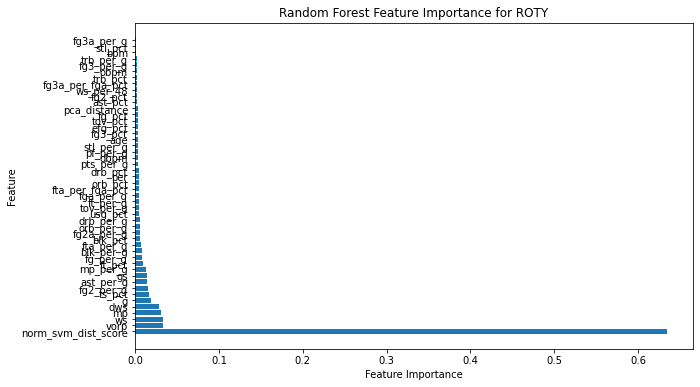

In [29]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 1: Prepare your data
X = roty.drop(columns=['player', 'pos', 'team_id', 'season', 'experience', 'first', 'share', 'svm_distance'])
# Drop the 'won_dpoy' column to create the feature matrix
# X = X.drop(columns=dropped_features)
y = roty['share']  # Select only the 'won_dpoy' column as the target variable

# Step 2: Import libraries

# Step 3: Instantiate the Random Forest model
rf_model = RandomForestRegressor()

# Step 4: Fit the model to your data
rf_model.fit(X, y)

# Step 5: Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Step 6: Pair feature importances with feature names
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Step 7: Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Visualize the importance of features using a bar plot
# Extract feature names and importances
features, importances = zip(*sorted_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for ROTY')
plt.show()